In [ ]:
from google.colab import drive
import os
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
%cd /content/drive/MyDrive/Dataset/

/content/drive/MyDrive/Dataset


In [ ]:
! unzip covid19-radiography-database

In [ ]:
if os.path.isdir('data/train/covid') is False:
  os.makedirs('data/train/normal')
  os.makedirs('data/train/covid')
  os.makedirs('data/test/normal')
  os.makedirs('data/test/covid')
  os.makedirs('data/valid/normal')
  os.makedirs('data/valid/covid')

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/COVID-19_Radiography_Dataset/COVID')

In [ ]:
for c in random.sample(glob.glob('COVID-*'), 2531):
  shutil.move(c, '../../data/train/covid')

for c in random.sample(glob.glob('COVID-*'), 723):
  shutil.move(c, '../../data/valid/covid')

for c in random.sample(glob.glob('COVID-*'), 362):
  shutil.move(c, '../../data/test/covid')

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/COVID-19_Radiography_Dataset/Normal')

In [ ]:
for c in random.sample(glob.glob('Normal-*'), 2531):
  shutil.move(c, '../../data/train/normal')

for c in random.sample(glob.glob('Normal-*'), 723):
  shutil.move(c, '../../data/valid/normal')

for c in random.sample(glob.glob('Normal-*'), 362):
  shutil.move(c, '../../data/test/normal')

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/')

In [ ]:
train_path = '/content/drive/My Drive/Dataset/data/train'
valid_path = '/content/drive/My Drive/Dataset/data/valid'
test_path =  '/content/drive/My Drive/Dataset/data/test'

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=train_path, target_size=(299, 299), classes=['covid','normal'])
valid_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=valid_path, target_size=(299, 299), classes=['covid','normal'])
test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=test_path, target_size=(299, 299), classes=['covid','normal'], shuffle=False)

Found 5062 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
Found 724 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(299,299,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 128)     36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 147, 147, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                    

In [ ]:
model.fit(
    x=train_gen,
    validation_data=valid_gen,
    epochs=50)

Epoch 1/50
159/159 [==============================] - 1291s 8s/step - loss: 0.6871 - accuracy: 0.5603 - val_loss: 0.6320 - val_accuracy: 0.6971
Epoch 2/50
159/159 [==============================] - 124s 781ms/step - loss: 0.5734 - accuracy: 0.7049 - val_loss: 0.4983 - val_accuracy: 0.7898
Epoch 3/50
159/159 [==============================] - 124s 781ms/step - loss: 0.4212 - accuracy: 0.8242 - val_loss: 0.3182 - val_accuracy: 0.8700
Epoch 4/50
159/159 [==============================] - 124s 781ms/step - loss: 0.3474 - accuracy: 0.8609 - val_loss: 0.2627 - val_accuracy: 0.9025
Epoch 5/50
159/159 [==============================] - 124s 781ms/step - loss: 0.2733 - accuracy: 0.8888 - val_loss: 0.2251 - val_accuracy: 0.9225
Epoch 6/50
159/159 [==============================] - 124s 780ms/step - loss: 0.2461 - accuracy: 0.9038 - val_loss: 0.2234 - val_accuracy: 0.9122
Epoch 7/50
159/159 [==============================] - 124s 780ms/step - loss: 0.2021 - accuracy: 0.9226 - val_loss: 0.1920 - v

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
if os.path.isdir('data/dataframes') is False:
  os.makedirs('data/dataframes')

if os.path.isdir('data/models') is False:
  os.makedirs('data/models')

if os.path.isdir('data/plots') is False:
  os.makedirs('data/plots')

In [ ]:
metrics.to_csv('data/dataframes/metrics.csv', index=False)
model.save('data/models/cnn_model.h5')

In [ ]:
files.download('data/dataframes/metrics.csv')
files.download('data/models/cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics = pd.read_csv('data/dataframes/metrics.csv')

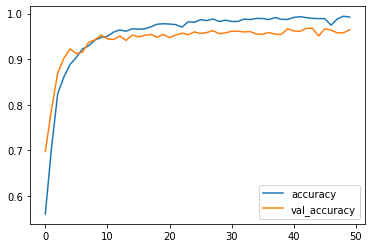

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

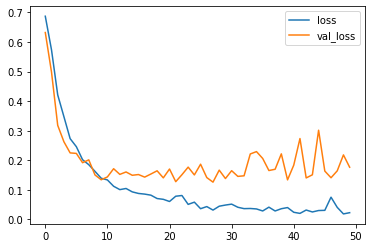

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
cnn_model = load_model('data/models/cnn_model.h5')

In [ ]:
preds = cnn_model.predict(x=test_gen)
print(classification_report(y_true= test_gen.classes, y_pred=np.argmax(preds, axis=-1), digits=4))

              precision    recall  f1-score   support

           0     0.9749    0.9669    0.9709       362
           1     0.9671    0.9751    0.9711       362

    accuracy                         0.9710       724
   macro avg     0.9710    0.9710    0.9710       724
weighted avg     0.9710    0.9710    0.9710       724



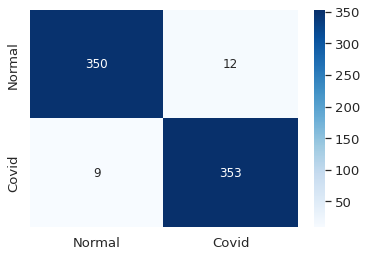

In [ ]:
cm = confusion_matrix(y_true= test_gen.classes, y_pred=np.argmax(preds, axis=-1))
labels = ['Normal', 'Covid']
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, annot_kws={"size": 12},cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
feature_selector = Sequential()
for layer in cnn_model.layers[:-2]:
    feature_selector.add(layer)

In [ ]:
feature_selector.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 128)     36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 147, 147, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                    

In [ ]:
train_arr = feature_selector.predict(x=train_gen)
train_df = pd.DataFrame(train_arr)
train_df['Result'] = train_gen.classes

In [ ]:
valid_arr = feature_selector.predict(x=valid_gen)
valid_df = pd.DataFrame(valid_arr)
valid_df['Result'] = valid_gen.classes

In [ ]:
test_arr = feature_selector.predict(x=test_gen)
test_df = pd.DataFrame(test_arr)
test_df['Result'] = test_gen.classes

In [14]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
valid_df = valid_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [15]:
train_df.to_csv('data/dataframes/train_df.csv', index=False)
valid_df.to_csv('data/dataframes/valid_df.csv', index=False)
test_df.to_csv('data/dataframes/test_df.csv', index=False)

In [16]:
files.download('data/dataframes/train_df.csv')
files.download('data/dataframes/valid_df.csv')
files.download('data/dataframes/test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Result
0,0.0,0.0,0.0,145.351013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.630173,0.0,0.0,0.0,20.643908,56.454819,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,81.233253,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,132.754608,120.629959,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,92.472557,0.0,0.0,162.945587,0.0,0.0,1
1,0.0,0.0,0.0,65.603409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.382378,0.0,0.0,0.0,0.000000,18.426950,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,9.166227,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,53.030849,78.990303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,42.342304,0.0,0.0,45.951942,0.0,0.0,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,79.299400,0.0,0.0,0.0,0.0,0.0,0.0,76.162811,85.968765,0.0,0.0,75.222946,0.000000,0.0,0.0,73.729584,0.0,0.0,0.0,33.009884,54.645775,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,52.423004,64.218201,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,23.886421,0.0,0.0,0.0,0.0,0.0,0.0,26.455809,32.604683,0.0,0.0,0.000000,0.000000,0.0,0.0,21.417929,0.0,0.0,0.0,13.478064,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,23.686674,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,16.378536,0.0,0.0,0.0,0.0,0.0,0.0,25.504272,21.028564,0.0,0.0,16.188761,0.000000,0.0,0.0,16.675667,0.0,0.0,0.0,9.239341,3.849124,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,13.687669,13.937279,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
